In [10]:
# Codigo visto en clase

import queue

class Grafo:
    # representacion con lista de adyacencias
    def __init__(self, vertices, aristas):
        self.vertices = vertices
        self.vecinos = [[] for v in vertices]
        for (v1, v2) in aristas:
            self.vecinos[v1].append(v2)
            self.vecinos[v2].append(v1)

def dfs(grafo, v, w):
    visitados = [False for x in grafo.vertices]
    pila = [v]
    visitados[v] = True
    while len(pila) > 0:
        x = pila.pop()
        if x == w:
            return True
        for y in grafo.vecinos[x]:
            if not visitados[y]:
                pila.append(y)
                visitados[y] = True
    return False

def bfs(grafo, v, w):
    visitados = [False for x in grafo.vertices]
    cola = queue.Queue()
    while not cola.empty():
        x = cola.get()
        if x == w:
            return True
        visitados[x] = True
        for y in grafo.vecinos[x]:
            if not visitados[y]:
                cola.put(y)
    return False


g = Grafo([0, 1, 2, 3, 4, 5, 6, 7], [[0, 1], [1, 2], [2, 3], [2, 4], [0, 5], [5, 6], [6, 4], [6, 7]])

print(dfs(g, 3, 4))

 
dependencias = {
    'MezclarBollo': [],
    'LevarBollo': ['MezclarBollo'],
    'PrepararSalsa': [],
    'ArmarPizza': ['LevarBollo', 'PrepararSalsa'],
    'PrecalentarHorno': [],
    'HornearPizza': ['ArmarPizza', 'PrecalentarHorno'],
    'ServirPizza': ['HornearPizza']
}

def dependencias_directas(grafo, paso):
    visitados = set()
    pila = [paso]
    while len(pila) > 0:
        x = pila.pop()
        visitados.add(x)
        for y in grafo[x]:
            if y not in visitados:
                pila.append(y)
    visitados.remove(paso)
    return visitados

print(dependencias_directas(dependencias, 'LevarBollo'))

True
{'MezclarBollo'}


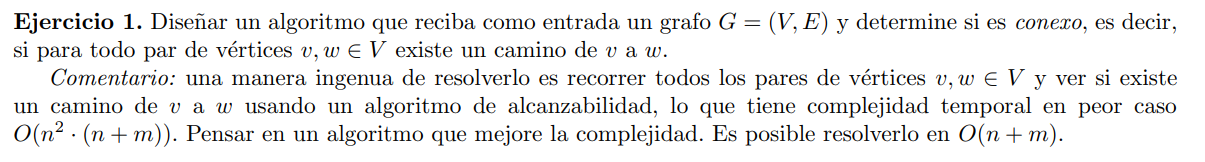

In [ ]:
class Grafo:
    def __init__(self, vertices, aristas):
        self.vertices = vertices
        self.vecinos = [[] for _ in vertices]
        for v, w in aristas:
            self.vecinos[v].append(w)
            self.vecinos[w].append(v)


def es_conexo(grafo):
    # uso dfs
    inicio = grafo.vertices[0]
    visitados = set()
    pila = [inicio]
    
    while len(pila) > 0:
        v = pila.pop()
        if v not in visitados:
            visitados.add(v)
            for w in grafo.vecinos[v]:
                if w not in visitados:
                    pila.append(w)

    return len(visitados) == len(grafo.vertices)

g1 = Grafo([0, 1, 2, 3], [(0, 1), (1, 2), (2, 3)])
g2 = Grafo([0, 1, 2], [(0, 1)])

print(es_conexo(g1))
print(es_conexo(g2))

True
False


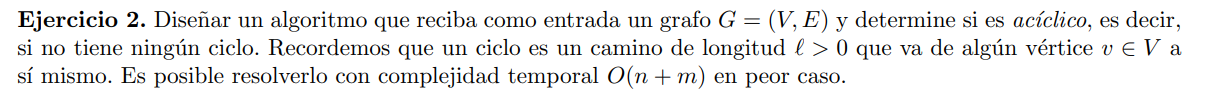

In [ ]:
class Grafo:
    def __init__(self, vertices, aristas):
        self.vertices = vertices
        self.vecinos = [[] for _ in vertices]
        for v, w in aristas:
            self.vecinos[v].append(w)
            self.vecinos[w].append(v)
        

def tiene_ciclos(grafo):
    visitados = set()
    for v0 in grafo.vertices: #para el caso de grafos separados
        if v0 in visitados:
            continue
        
        pila = [(v0, None)]
        visitados.add(v0)

        while len(pila) > 0:
            (x, de_donde_viene) = pila.pop()
            for y in grafo.vecinos[x]:
                if y == de_donde_viene:
                    continue
                if y in visitados:
                    return True
                pila.append((y, x))
                visitados.add(y)
    
    return False


grafo = Grafo([0,1,2,3], [(0,1), (1,2), (1,3)])
print(tiene_ciclos(grafo))

False


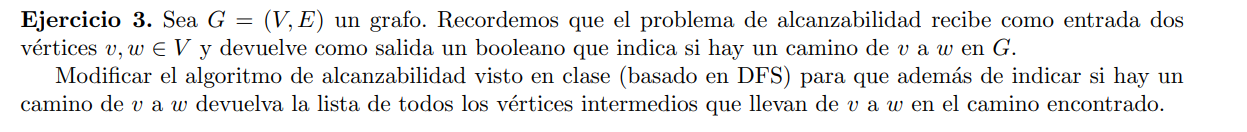

In [ ]:
class Grafo:
    def __init__(self, vertices, aristas):
        self.vertices = vertices
        self.vecinos = [[] for _ in vertices]
        for v, w in aristas:
            self.vecinos[v].append(w)
            self.vecinos[w].append(v)

def dfs(grafo, v, w):
    visitados2 = [False for x in grafo.vertices]
    visitados = [False for x in grafo.vertices]
    pila = [v]
    
    visitados[v] = True
    visitados2[v] = v
    
    while len(pila) > 0:
        x = pila.pop()
        if x == w:
            camino = []
            actual = w
            while actual is not None:
                camino.append(actual)
                actual = visitados2[actual]
                
            return (True, visitados2)
        for y in grafo.vecinos[x]:
            if not visitados[y]:
                pila.append(y)
                visitados[y] = True
                visitados2[y] = x
                
    return (False, None)

g = Grafo([0, 1, 2, 3, 4, 5, 6, 7], [[0, 1], [1, 2], [2, 3], [2, 4], [0, 5], [5, 6], [6, 4], [6, 7]])
print(dfs(g, 1, 4))